In [5]:
#!conda install -c conda-forge geocoder --yes
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install opencage==1.1.0
#!pip install geocoder
#!pip install descartes
#!pip install geopandas

    100% |████████████████████████████████| 901kB 2.7MB/s ta 0:00:01
    100% |████████████████████████████████| 4.4MB 6.0MB/s eta 0:00:01
    100% |████████████████████████████████| 15.8MB 1.3MB/s eta 0:00:01   62% |████████████████████            | 9.9MB 47.2MB/s eta 0:00:01
    100% |████████████████████████████████| 1.5MB 17.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyproj ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/89/77/ec/a537585d1022dafde0317dd19d33c4a30d4ee61e19f25ebd8e
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch


In [1]:
import pandas as pd
import urllib.request
import requests
import csv
import numpy as np
from geopy.geocoders import Nominatim
import geocoder as gc
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
NJ=pd.read_csv("NJ_DATA_1.csv",index_col=None)
NJ.columns = NJ.columns.str.replace(' ', '_')
NJ.rename(columns={'2015_Population':'Pop_2015', '2045_Population':'Pop_2045', 'Annualized_%_Population_Change_2015-2045':'Pop_Change', '2015_Households':'House_2015', '2045_Households':'House_2045', 'Annualized_%_Household_Change_2015-2045':'House_Change', '2015_Employment':'Employ_2015', '2045_Employment':'Employ_2045', 'Annualized_%_Employment_Change_2015-2045':'Employ_Change'}, inplace=True)
NJ["Pop_2015"] = NJ["Pop_2015"].str.replace(",","").astype(float)
NJ["Pop_2045"] = NJ["Pop_2045"].str.replace(",","").astype(float)
NJ["House_2015"] = NJ["House_2015"].str.replace(",","").astype(float)
NJ["House_2045"] = NJ["House_2045"].str.replace(",","").astype(float)
NJ["Employ_2015"] = NJ["Employ_2015"].str.replace(",","").astype(float)
NJ["Employ_2045"] = NJ["Employ_2045"].str.replace(",","").astype(float)
#NJ["Pop_Change"] = NJ["Pop_Change"].str.replace("%","").astype(float)/100 
#NJ["House_Change"] = NJ["House_Change"].str.replace("%","").astype(float)/100 
#NJ["Employ_Change"] = NJ["Employ_Change"].str.replace("%","").astype(float)/100 
NJ['Employ_Change']=NJ['Employ_2045']/NJ['Employ_2015']-1
NJ['Pop_Change']=NJ['Pop_2045']/NJ['Pop_2015']-1
NJ['House_Change']=NJ['House_2045']/NJ['House_2015']-1
NJ.head()

,County,Municipality_Code,Municipality_Name,Pop_2015,Pop_2045,Pop_Change,House_2015,House_2045,House_Change,Employ_2015,Employ_2045,Employ_Change
0,Bergen,3.400301e+09,Allendale borough,6674.0,7335.0,0.099041,2262.0,2483.0,0.097701,2836.0,3064.0,0.080395
1,Bergen,3.400301e+09,Alpine borough,1849.0,1849.0,0.000000,611.0,611.0,0.000000,415.0,415.0,0.000000
2,Bergen,3.400305e+09,Bergenfield borough,27181.0,29602.0,0.089070,8890.0,9682.0,0.089089,4025.0,4694.0,0.166211
3,Bergen,3.400306e+09,Bogota borough,8284.0,9397.0,0.134355,2773.0,3136.0,0.130905,1015.0,1336.0,0.316256
4,Bergen,3.400310e+09,Carlstadt borough,6224.0,6833.0,0.097847,2384.0,2607.0,0.093540,12855.0,13455.0,0.046674


In [3]:
gdf=gpd.read_file('Shape/NJTPA_Traffic_Analysis_Zones_2010.shp')

In [4]:
gdf.head()

,OBJECTID,TAZ2008,FIRST_COUN,FIRST_Muni,FIRST_Mu_1,SUM_Pop201,SUM_Hous20,SUM_OccH20,SUM_VacH20,SUM_Emp201,Shapearea,Shapelen,geometry
0,1,26,003,700,Allendale borough,6505,2388,2236,152,2868.997195,0.000865,0.143559,"POLYGON ((-74.114554503581 41.04363931711192, ..."
1,2,27,003,1090,Alpine borough,1849,670,611,59,432.562691,0.001777,0.231863,POLYGON ((-73.92718243570442 40.91750629918602...
2,3,28,003,53430,Northvale borough,3824,1312,1283,29,1277.568880,0.000212,0.069238,POLYGON ((-73.94515460729468 41.01637418171505...
3,4,29,003,64170,Rockleigh borough,1347,409,356,53,4313.555389,0.000418,0.085998,POLYGON ((-73.92208143948106 41.00590531658643...
4,5,30,003,53610,Norwood borough,5711,2007,1927,80,1921.383114,0.000758,0.140368,"POLYGON ((-73.95186144869049 41.0002073144278,..."


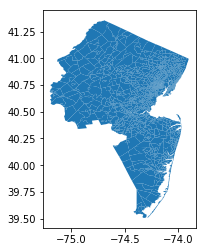

In [5]:
gdf.plot()

In [14]:
from matplotlib.colors import LinearSegmentedColormap
def plot_on_map(gdf,Y):
    gdf['Y']=float('nan') #add a column for colors to visualize
    for i in gdf.index:
        if gdf.FIRST_Mu_1[i] in Y.keys(): #if the code of the mesoregion shape has the data corresponding to it
            gdf['Y'][i]=1.0*Y[gdf.FIRST_Mu_1[i]]/max(Y.values()) #set a color corresponding to the quantity
    ax=gdf.dropna().plot(column='Y',cmap = 'cool')
    return gdf

In [10]:
#pop = NJ[['Municipality_Name', 'Pop_Change']].copy()
#pop = pop.to_dict()
#pop_keys = NJ['Municipality_Name'].copy()
#pop_values = NJ['Pop_Change'].copy()
#dictionary = dict(zip(pop_keys, pop_values))
#dictionary.keys
MN=NJ.Municipality_Name.unique(); 
PNames={r['Municipality_Name']:r['Pop_Change'] for i,r in NJ.iterrows()}
ENames={r['Municipality_Name']:r['Employ_Change'] for i,r in NJ.iterrows()}


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


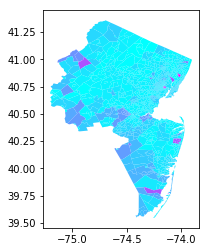

<Figure size 2880x1440 with 0 Axes>

In [15]:
plot_on_map(gdf,ENames);

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


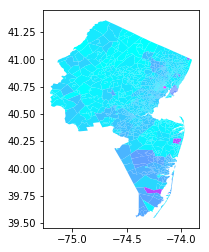

In [9]:
plot_on_map(gdf,PNames);